## Question: Structuring the data

In the industry, we often have to deal with unstructured data. Sometimes we have the privilege of
structure but the features may or may not be intuitive! In such a scenario, we need to study the
distribution of the data and make predictions.
Enough words, now its time to jump to action. Given the dataset here, perform distribution analysis
and classify the data into appropriate labels.
2


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


def local_dataset():
    dataset = pd.read_csv("../dataset/train_data_question_3.csv", nrows=5)

    # Convert the dataset into a data frame.
    df = pd.DataFrame(dataset)

    # Returh the data frame.
    return df


# Call the data set
data = local_dataset()

# # Load the dataset
# data = pd.read_csv("../dataset/train_data_question_3.csv", nrows=5)

In [7]:
"""The following codes is for the corelation matrix. But needs high computing unit."""

# import seaborn as sns
# import numpy as np

# correlation_matrix = data.corr()
# plt.figure(figsize=(12, 10))
# sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
# plt.title("Correlation Matrix")
# plt.show()

# from scipy.stats import zscore

# z_scores = zscore(data.select_dtypes(include="number"))
# abs_z_scores = np.abs(z_scores)
# outlier_rows = (abs_z_scores > 3).any(axis=1)
# data_no_outliers = data[~outlier_rows]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Columns: 4609 entries, Feature_0 to label
dtypes: float64(4608), int64(1)
memory usage: 180.2 KB
None
   Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0  -0.302709   0.044915   0.309531   0.066957   0.069242   0.128698   
1  -0.150099  -0.253361  -0.145519   0.359803  -0.247028   0.063478   
2  -0.433461   0.248293  -0.168033  -0.232447   0.126926   0.066677   
3   0.102219   0.039029   0.064893  -0.031202  -0.006220  -0.223574   
4   0.045833   0.042785  -0.112945   0.506616  -0.341816  -0.044501   

   Feature_6  Feature_7  Feature_8  Feature_9  ...  Feature_4599  \
0  -0.155763   0.127795   0.349006  -0.134220  ...     -0.192290   
1  -0.266756  -0.117138   0.308962  -0.007129  ...     -0.060431   
2  -0.135699   0.078125  -0.235867  -0.020475  ...     -0.185728   
3  -0.093189  -0.141190  -0.162152  -0.190677  ...      0.292258   
4   0.079854  -0.131959  -0.148224  -0.083467  ...     -0.11295

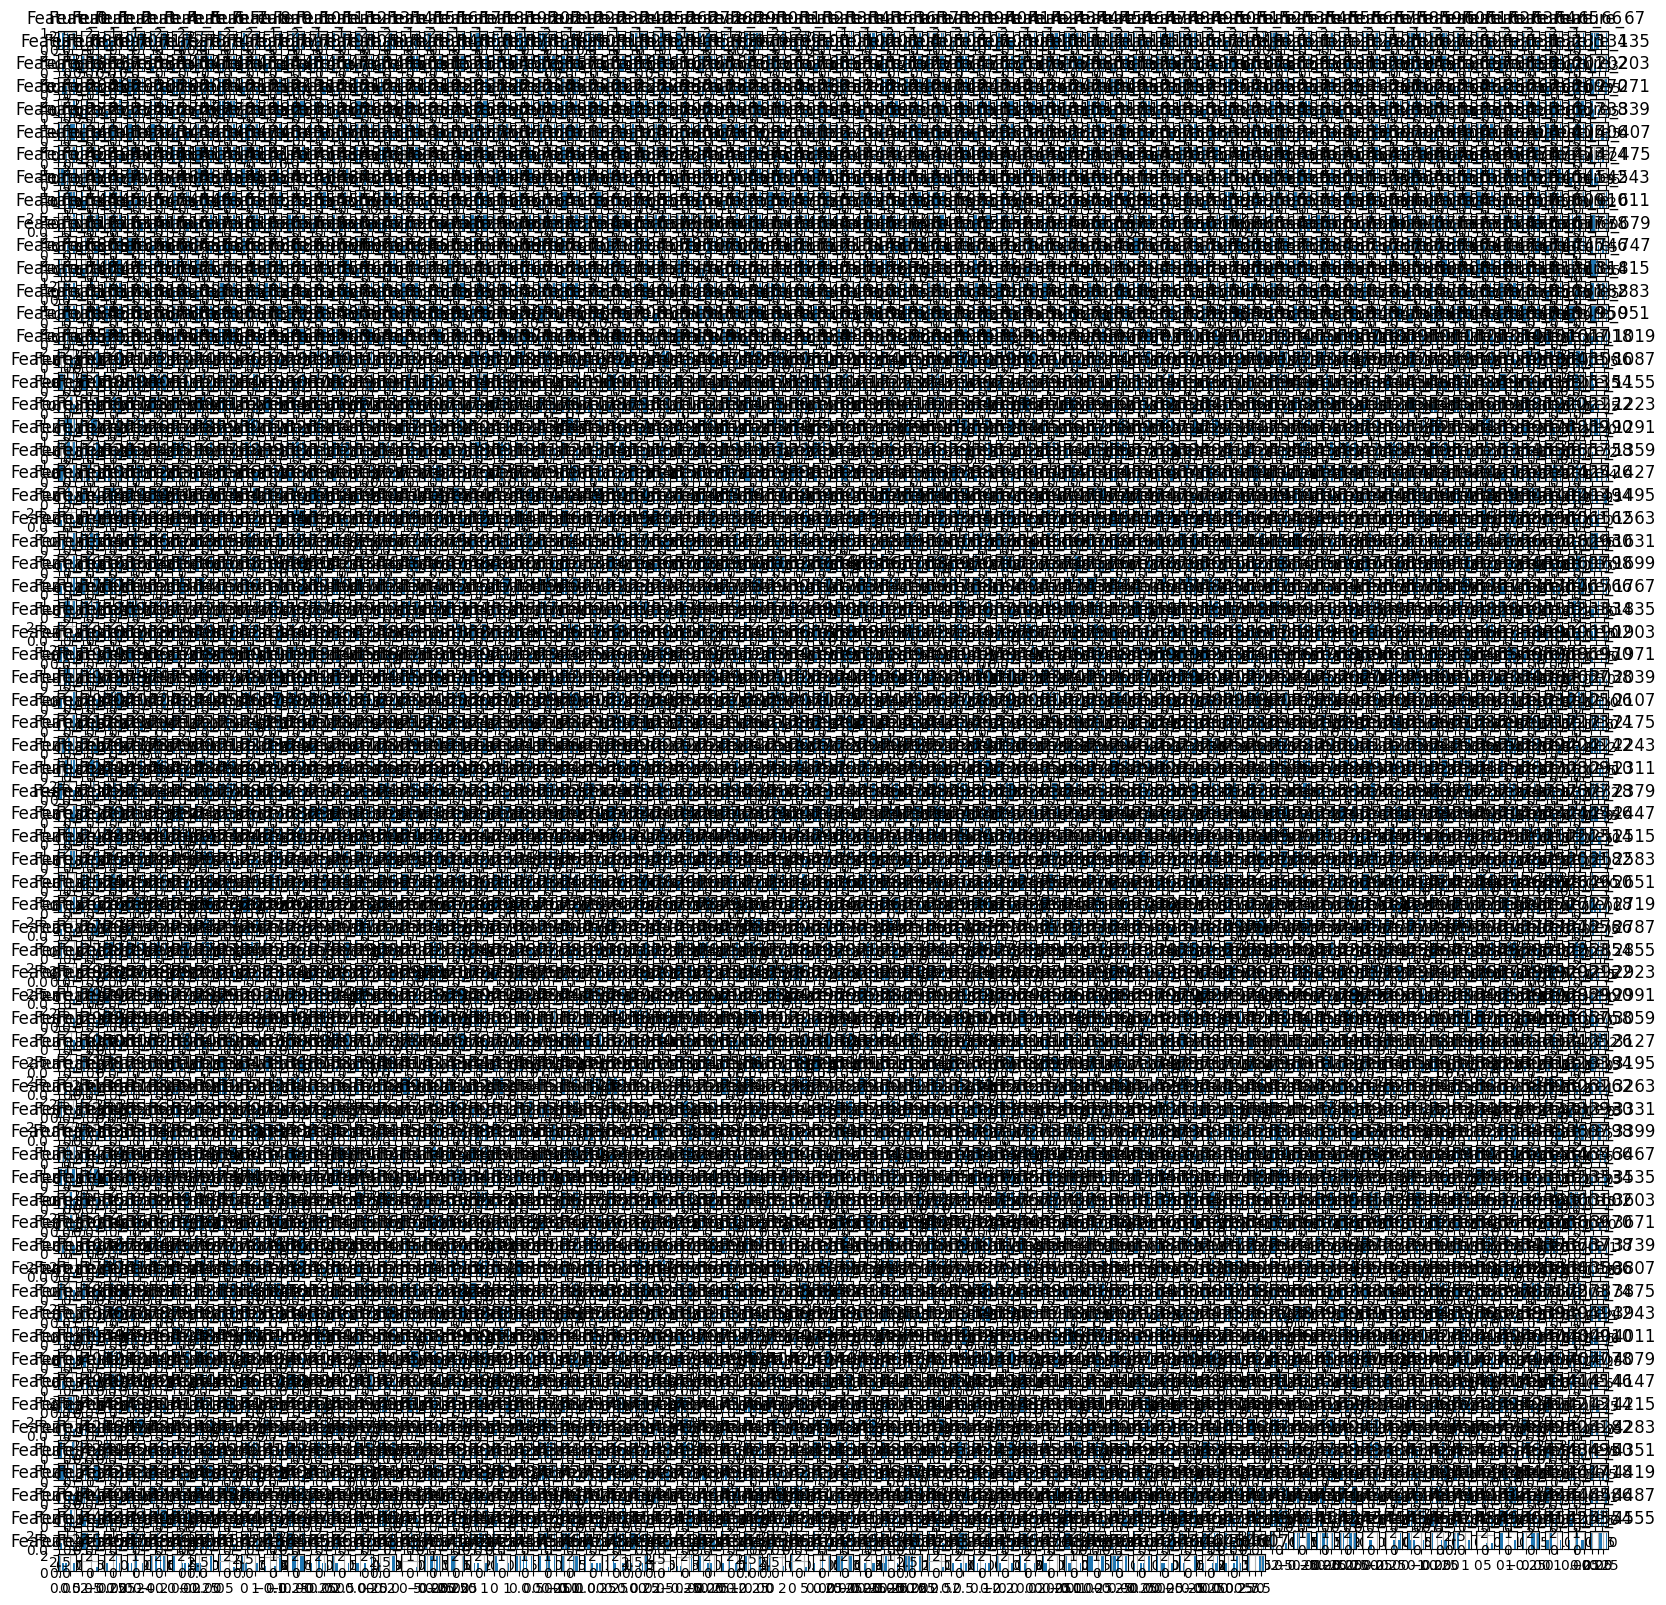

In [8]:
# Display basic information about the dataset
print(data.info())

# Display the first few rows of the dataset
print(data.head())

# Perform distribution analysis
# For example, you can plot histograms for numerical features
data.hist(figsize=(20, 20))
plt.show()

In [10]:
# Dimensionality reduction using PCA
pca = PCA(n_components=5)  # Reduce to 50 components
X_pca = pca.fit_transform(data.iloc[:, 1:])

# Fit KMeans clustering on the reduced data
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca)
labels = kmeans.labels_
print("Total number of labels: ", labels)
# Add the cluster labels to the dataset
data["cluster"] = labels

# Display the updated dataset
print(data.head())

Total number of labels:  [0 1 2 0 0]
   Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0  -0.302709   0.044915   0.309531   0.066957   0.069242   0.128698   
1  -0.150099  -0.253361  -0.145519   0.359803  -0.247028   0.063478   
2  -0.433461   0.248293  -0.168033  -0.232447   0.126926   0.066677   
3   0.102219   0.039029   0.064893  -0.031202  -0.006220  -0.223574   
4   0.045833   0.042785  -0.112945   0.506616  -0.341816  -0.044501   

   Feature_6  Feature_7  Feature_8  Feature_9  ...  Feature_4600  \
0  -0.155763   0.127795   0.349006  -0.134220  ...     -0.016507   
1  -0.266756  -0.117138   0.308962  -0.007129  ...     -0.095619   
2  -0.135699   0.078125  -0.235867  -0.020475  ...      0.181677   
3  -0.093189  -0.141190  -0.162152  -0.190677  ...     -0.095911   
4   0.079854  -0.131959  -0.148224  -0.083467  ...     -0.003558   

   Feature_4601  Feature_4602  Feature_4603  Feature_4604  Feature_4605  \
0      0.014300     -0.178668     -0.350076      0.3

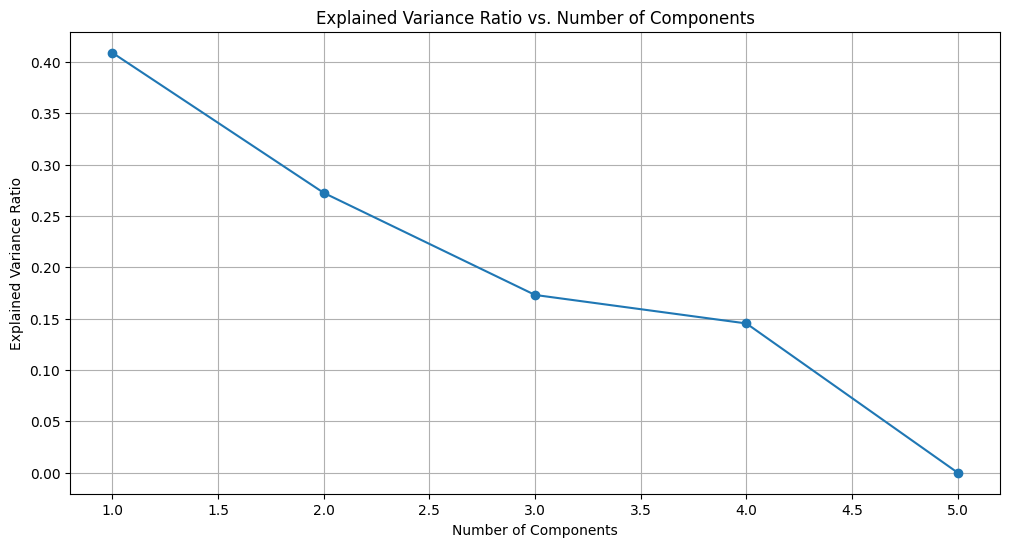

In [19]:
# Calculate the explained variance ratio to understand how much information is preserved by each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio for each principal component
plt.figure(figsize=(12, 6))
plt.plot(
    range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker="o"
)
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance Ratio vs. Number of Components")
plt.grid(True)
plt.show()

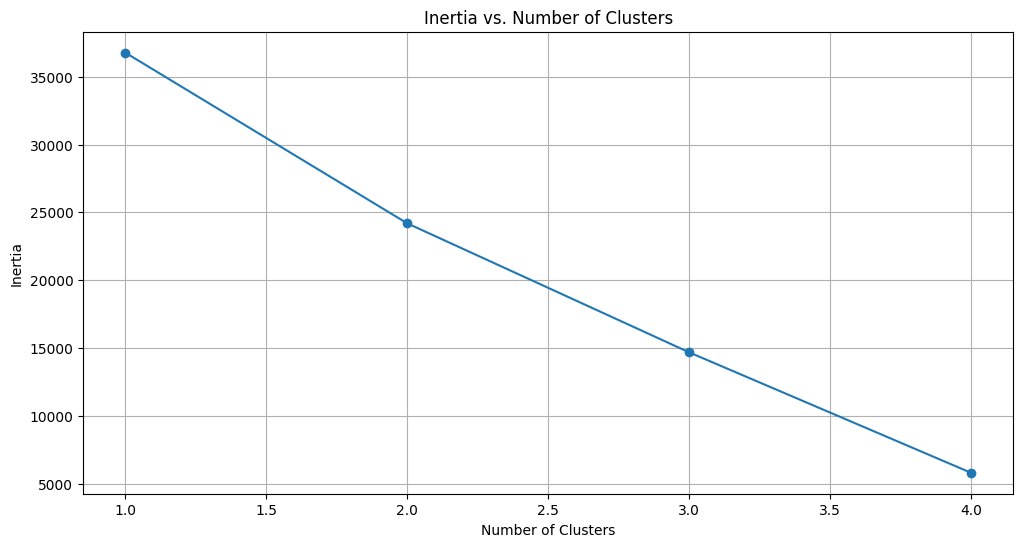

In [20]:
inertia = []
max_clusters = min(
    10, len(X_pca) - 1
)  # Ensure max clusters is less than or equal to the number of samples - 1
for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_pca)
    inertia.append(kmeans.inertia_)

# Plot the inertia (sum of squared distances to the closest centroid) to find the elbow point
plt.figure(figsize=(12, 6))
plt.plot(range(1, max_clusters + 1), inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Inertia vs. Number of Clusters")
plt.grid(True)
plt.show()